In [1]:
!unzip ./archive\ \(67\).zip

Archive:  ./archive (67).zip
  inflating: names-by-nationality.csv  


In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('./names-by-nationality.csv')

In [42]:
data.head()

,name,sex,nationality
0,Aarav,Male,Indian
1,Aaryan,Male,Indian
2,Abha,Female,Indian
3,Abhay,Male,Indian
4,Abhilash,Male,Indian


In [43]:
len(data)

4695

In [44]:
data.isna().sum()

name           0
sex            0
nationality    0
dtype: int64

In [45]:
import json
def object_to_int(data,coloum):
    info_dict = {}
    all_info = []
    index = -1
    for info in data[coloum]:
        if info not in info_dict:
            index = index + 1
            info_dict[info] = index
    for info in data[coloum]:
        all_info.append(info_dict[info])
    with open(f'{coloum}.json','w') as json_file:
        json.dump(info_dict,json_file)
    return all_info,info_dict

In [46]:
nationality_info = object_to_int(data,'nationality')
data['nationality'] = nationality_info[0]

In [47]:
data.head()

,name,sex,nationality
0,Aarav,Male,0
1,Aaryan,Male,0
2,Abha,Female,0
3,Abhay,Male,0
4,Abhilash,Male,0


In [48]:
!ls

'archive (67).zip'   model_n.pkl	        nationality.json
 gender.json	     model_s.pkl	        README.md
 main.ipynb	     names-by-nationality.csv   sex.json


In [49]:
sex_info = object_to_int(data,'sex')
data['sex'] = sex_info[0]

In [50]:
data.head()

,name,sex,nationality
0,Aarav,0,0
1,Aaryan,0,0
2,Abha,1,0
3,Abhay,0,0
4,Abhilash,0,0


In [51]:
data['sex'].value_counts()

1    2573
0    1356
2     766
Name: sex, dtype: int64

In [52]:
data.head()

,name,sex,nationality
0,Aarav,0,0
1,Aaryan,0,0
2,Abha,1,0
3,Abhay,0,0
4,Abhilash,0,0


<AxesSubplot:xlabel='sex'>

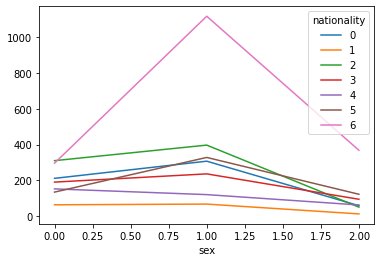

In [53]:
import matplotlib.pyplot as plt
pd.crosstab(data['sex'],data['nationality']).plot()

In [54]:
data.head()

,name,sex,nationality
0,Aarav,0,0
1,Aaryan,0,0
2,Abha,1,0
3,Abhay,0,0
4,Abhilash,0,0


In [55]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier,Ridge,RidgeClassifierCV,RidgeCV
from sklearn.naive_bayes import GaussianNB
import pickle
import os

In [56]:

def fit_and_calcuate_metrixs(models:dict,X_train,X_test,y_train,y_test):
    models_info = {}
    for name,model in models.items():
        print(name)
        model = model.fit(X_train,y_train)
        y_preds = model.predict(X_test)
        try:
            info = {
                'Accuracy':model.score(X_test,y_test),
                'F1 Score':f1_score(y_test,y_preds,average='macro'),
                'Precision':precision_score(y_test,y_preds,average='macro'),
                'Recall':recall_score(y_test,y_preds,average='macro')
            }
            plot_confusion_matrix(model,X_test,y_test)
        except:
            info = {'Accuracy':model.score(X_test,y_test)}
        models_info[name] = info
        print('\n\n')
    return models_info
def calcuate_metrixs(models:dict,X_train,X_test,y_train,y_test):
    models_info = {}
    for name,model in models.items():
        print(name)
        y_preds = model.predict(X_test)
        info = {
            'Accuracy':model.score(X_test,y_test),
            'F1 Score':f1_score(y_test,y_preds,average='macro'),
            'Precision':precision_score(y_test,y_preds,average='macro'),
            'Recall':recall_score(y_test,y_preds,average='macro')
        }
        plot_confusion_matrix(model,X_test,y_test)
        plot_roc_curve(model,X_test,y_test)
        models_info[name] = info
        print('\n\n')
    return models_info

In [57]:
data

,name,sex,nationality
0,Aarav,0,0
1,Aaryan,0,0
2,Abha,1,0
3,Abhay,0,0
4,Abhilash,0,0
...,...,...,...
4690,Worth,0,6
4691,Wrigley,2,6
4692,X-iomania,1,6
4693,Xadrian,0,6


In [58]:
data

,name,sex,nationality
0,Aarav,0,0
1,Aaryan,0,0
2,Abha,1,0
3,Abhay,0,0
4,Abhilash,0,0
...,...,...,...
4690,Worth,0,6
4691,Wrigley,2,6
4692,X-iomania,1,6
4693,Xadrian,0,6


In [59]:
X = data['name']
y = data['sex']

GradientBoostingClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





ExtraTreesClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





BaggingClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





AdaBoostClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





RandomForestClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





SGDClassifier



RidgeClassifier



ExtraTreeClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





DecisionTreeClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


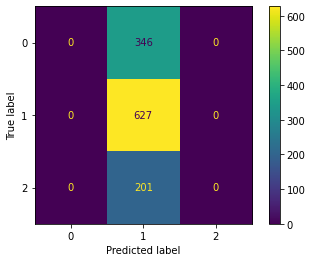

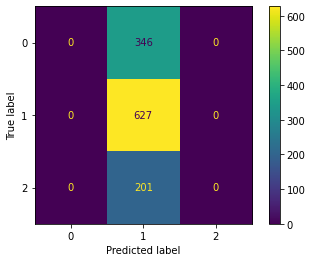

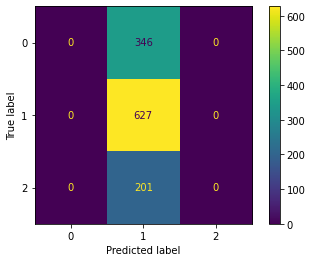

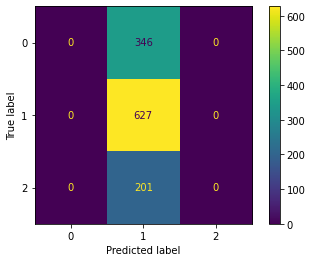

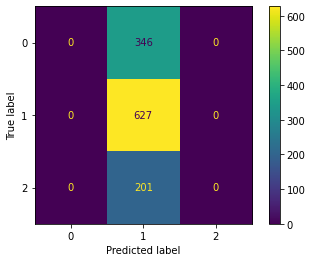

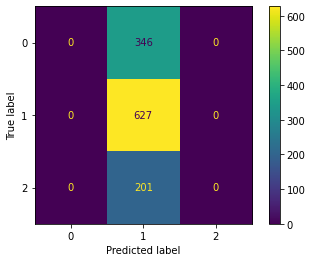

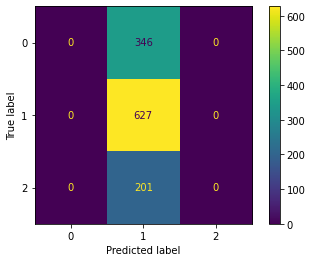

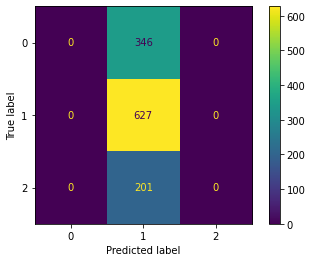

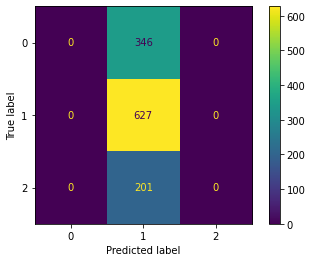

In [60]:
X = data['name']
y = data['sex']
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
cv.fit(X)
X = cv.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
models = {
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SGDClassifier':SGDClassifier(),
    'RidgeClassifier':RidgeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
}
models_clf_results = fit_and_calcuate_metrixs(models,X_train,X_test,y_train,y_test)
models_clf_results = pd.DataFrame(models_clf_results.values(),models_clf_results.keys())

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

GradientBoostingClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





ExtraTreesClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





BaggingClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





AdaBoostClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





RandomForestClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





SGDClassifier



RidgeClassifier



ExtraTreeClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





DecisionTreeClassifier


/home/ranuga/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


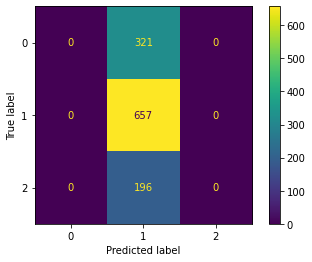

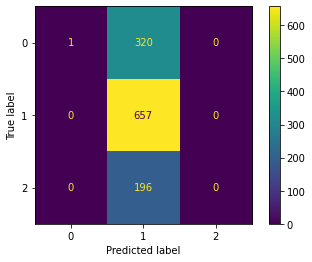

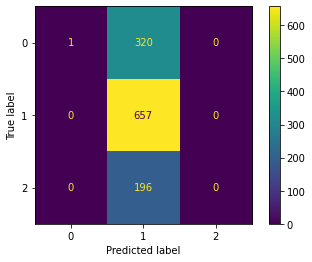

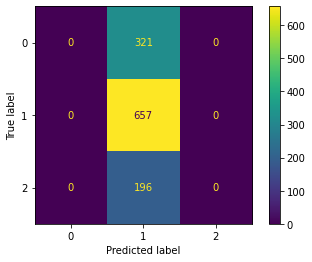

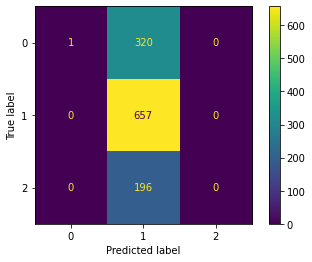

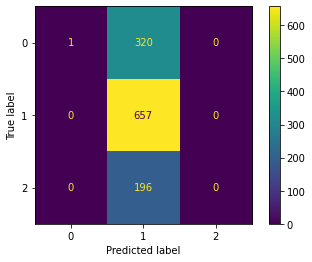

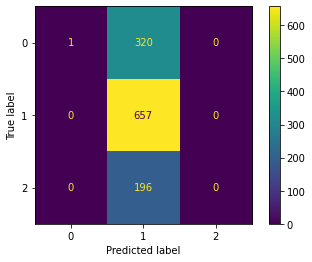

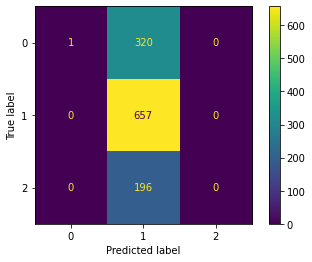

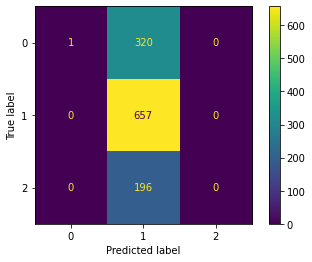

In [62]:
models = {
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SGDClassifier':SGDClassifier(),
    'RidgeClassifier':RidgeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
}
models_clf_results = fit_and_calcuate_metrixs(models,X_train,X_test,y_train,y_test)
models_clf_results = pd.DataFrame(models_clf_results.values(),models_clf_results.keys())

In [63]:
models_clf_results

,Accuracy,F1 Score,Precision,Recall
GradientBoostingClassifier,0.559625,0.239214,0.186542,0.333333
ExtraTreesClassifier,0.560477,0.241415,0.520034,0.334372
BaggingClassifier,0.560477,0.241415,0.520034,0.334372
AdaBoostClassifier,0.559625,0.239214,0.186542,0.333333
RandomForestClassifier,0.560477,0.241415,0.520034,0.334372
SGDClassifier,0.560477,0.241415,0.520034,0.334372
RidgeClassifier,0.560477,0.241415,0.520034,0.334372
ExtraTreeClassifier,0.560477,0.241415,0.520034,0.334372
DecisionTreeClassifier,0.560477,0.241415,0.520034,0.334372


<AxesSubplot:>

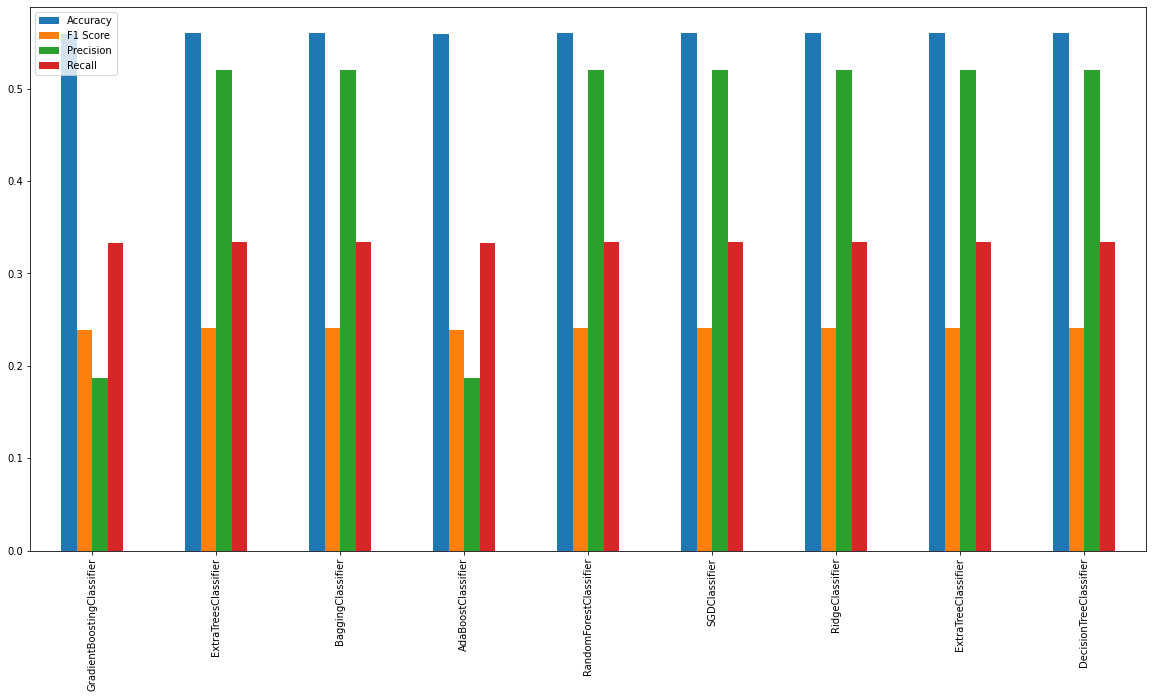

In [64]:
models_clf_results.plot.bar(figsize=(20,10))

### SGDClassifier

In [79]:
grid = {
    'loss':['log','hinge','perceptron'],
    'penalty':['l2','l1','elasticnet'],
    'alpha':[0.25],
    'shuffle':[True,False],
    'warm_start':[True,False],
    'l1_ratio':[0.25],
    'epsilon':[0.25],
    'power_t':[0.25],
    'average':[False,True]
}
gs = GridSearchCV(SGDClassifier(),cv=2,verbose=25,param_grid=grid).fit(X_train,y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=log, penalty=l2, power_t=0.25, shuffle=True, warm_start=True 
[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=log, penalty=l2, power_t=0.25, shuffle=True, warm_start=True, score=0.544, total=   0.0s
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=log, penalty=l2, power_t=0.25, shuffle=True, warm_start=True 
[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=log, penalty=l2, power_t=0.25, shuffle=True, warm_start=True, score=0.544, total=   0.0s
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=log, penalty=l2, power_t=0.25, shuffle=True, warm_start=False 
[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=log, penalty=l2, power_t=0.25, shuffle=True, warm_start=False, score=0.544, total=   0.0s
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=log, penalty=l2, p

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l1, power_t=0.25, shuffle=True, warm_start=True, score=0.544, total=   0.0s
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l1, power_t=0.25, shuffle=True, warm_start=True 
[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l1, power_t=0.25, shuffle=True, warm_start=True, score=0.544, total=   0.0s
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l1, power_t=0.25, shuffle=True, warm_start=False 
[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l1, power_t=0.25, shuffle=True, warm_start=False, score=0.544, total=   0.0s
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l1, power_t=0.25, shuffle=True, warm_start=False 
[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l1, power_t=0.25, shuffle=True, warm_start=False, s

[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=elasticnet, power_t=0.25, shuffle=True, warm_start=False, score=0.544, total=   0.0s
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=elasticnet, power_t=0.25, shuffle=True, warm_start=False 
[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=elasticnet, power_t=0.25, shuffle=True, warm_start=False, score=0.544, total=   0.0s
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=elasticnet, power_t=0.25, shuffle=False, warm_start=True 
[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=elasticnet, power_t=0.25, shuffle=False, warm_start=True, score=0.544, total=   0.0s
[CV] alpha=0.25, average=False, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=elasticnet, power_t=0.25, shuffle=False, warm_start=True 
[CV]  alpha=0.25, average=False, epsilon=0.25, l1_ra

[CV]  alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l2, power_t=0.25, shuffle=True, warm_start=False, score=0.544, total=   0.0s
[CV] alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l2, power_t=0.25, shuffle=True, warm_start=False 
[CV]  alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l2, power_t=0.25, shuffle=True, warm_start=False, score=0.544, total=   0.0s
[CV] alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l2, power_t=0.25, shuffle=False, warm_start=True 
[CV]  alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l2, power_t=0.25, shuffle=False, warm_start=True, score=0.544, total=   0.0s
[CV] alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l2, power_t=0.25, shuffle=False, warm_start=True 
[CV]  alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=hinge, penalty=l2, power_t=0.25, shuffle=False, warm_start=True, score

[CV]  alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=l1, power_t=0.25, shuffle=True, warm_start=False, score=0.544, total=   0.0s
[CV] alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=l1, power_t=0.25, shuffle=False, warm_start=True 
[CV]  alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=l1, power_t=0.25, shuffle=False, warm_start=True, score=0.544, total=   0.0s
[CV] alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=l1, power_t=0.25, shuffle=False, warm_start=True 
[CV]  alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=l1, power_t=0.25, shuffle=False, warm_start=True, score=0.162, total=   0.0s
[CV] alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=l1, power_t=0.25, shuffle=False, warm_start=False 
[CV]  alpha=0.25, average=True, epsilon=0.25, l1_ratio=0.25, loss=perceptron, penalty=l1, power_t=0.25, s

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.9s finished


In [80]:
gs.score(X_test,y_test)

0.5596252129471891

In [ ]:
pickle.dump(gs,open('model.pkl','wb'))